# Graphical Instruments for a Timely Adaptation to Climate Change

Author: Luciano Raso, Delft University of Technology, Delft, The Netherlands. Section of Policy Analysis   
email: l.raso@tudelft.nl

In [30]:
from numpy import *
#%matplotlib notebook 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import scipy
from scipy import interpolate
from scipy.stats import gumbel_r, norm
import time
import matplotlib.lines as mlines

pathfig = '../figures/Afsluitdijk/'

In [3]:
def T_PS(P0,P1,S_star_range):
    
    
    def prob_errors(P0,P1,S):
    
        significance = 1- P0.cdf(S)
        power =  P1.cdf(S)
        return (significance,power)
    
    
    def prob_errors_sample_cdf(sample_0,sample_1,S):
        
        significance = 1 - sum(i < S for i in sample_0) / len(sample_0)
        power =  sum(i < S for i in sample_1) / len(sample_1)
        return (significance,power)

    
    
    S_star_r=pd.DataFrame([],index=S_star_range,columns=['significance','power'])
    S_star_r.index.rename('S')
    
    #test
    if type (P0) == type(P1) == scipy.stats._distn_infrastructure.rv_frozen:
        P_analytical=True
    elif type(P0) == type(P1) == ndarray:
        P_analytical=False
    else:
        raise ValueError('Probability P0 or P1 not of the right (or same) type')
    
    #do
    for S_star in S_star_range:
        if P_analytical:
            [significance,power] = prob_errors(P0,P1,S_star)
            S_star_r.loc[S_star]['significance']=significance
            S_star_r.loc[S_star]['power']=power
        else: #P empirical
            [significance,power] = prob_errors_sample_cdf(P0,P1,S_star)
            S_star_r.loc[S_star]['significance']=significance
            S_star_r.loc[S_star]['power']=power
    return(S_star_r)




T_PS_specifics = lambda S:plt.gca().set(ylim=[-0.01,1.05],title=S.name+', T-PS plot',xlabel='Trigger value ['+S.unit+']')

T_P_specifics = lambda S:plt.gca().set(ylim=[-0.01,1.05],title=S.name+', T-P plot',xlabel='Trigger value ['+S.unit+']',ylabel='Probability')


def S_empirical_cdf(signpost,lambda_id,N=3000):
    """ Create a sample of signpost estimates of dimension N at critical uncertainties lambda_id
    """

    S_estimation=empty(N)
    for i in range(N):
        data_series=pd.Series(signpost.P_S_lambda[lambda_id].rvs(size=signpost.window+1))
        S_estimation[i]=signpost.statistic(data_series).loc[signpost.window]   
    return (S_estimation)

In [13]:
!cd .. 
!ls

Adaptive_Afsluitdijk.ipynb
Afsluitdijk.py
Afsluitdijk_case_v0.4.ipynb
Analysis_Change_Storm_Surge_Intensity_AfD.ipynb
DenHelderYearlyMeanWaterLevel.rtf
Import_Data_AfsluitdijkProject_v0.0.ipynb
Import_Data_AfsluitdijkProject_v2.0.ipynb
Monitoring_2v0.1.ipynb
Monitoring_2v0.2.ipynb
Monitoring_2v0.3.ipynb
__pycache__
build
cc_symbol.png
dike_model.py
dike_model_c.c
dike_model_c.cpython-35m-darwin.so
dike_model_c.pyx
old files
setup_dike.py
signpost_evaluation.py
test_c_code.py
urb_symbol.png


In [15]:
#load stress test data
F=pd.read_csv('../data/Afsluitdijk/Stress_test')
F.index=F['sea level rise rate']
del F['sea level rise rate']

In [16]:
# find tippint surface
F_tipping=5000
f_tip_aux={}
for surge in F.index:
    f = interpolate.interp1d(F.loc[surge].values,np.array(F.columns))
    f_tip_aux[surge]=f(F_tipping)

In [17]:
f_tip=interpolate.interp1d

Critical assumptions

In [18]:
lambda_={}

In [19]:
lambda_['CA']= (3.6,1.9)

## Tipping point selection

Change in sea level rise rate only

In [20]:
lambda_['SLR_plus'] = ( 18, 1.9 )

Change in storm surge only

In [21]:
lambda_['SS_plus'] = ( 4 , 2.17 ) # Storm surge

Nature path tipping point

In [31]:
lambda_['SLR_minus'] = ( 0, 1.9 )
lambda_['SS_minus'] = ( 3.6, 1.82 )

/Users/lraso/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/lraso/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


(1.7, 2.3)

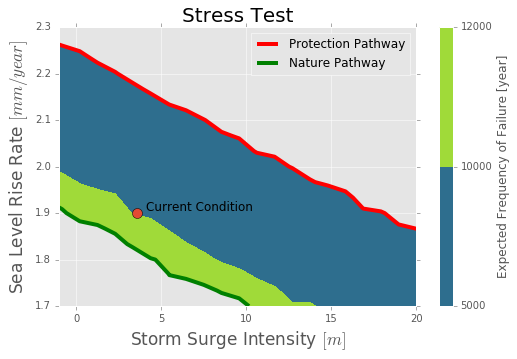

In [32]:
# plot Stress Test
fig = plt.figure(figsize=(8,5))
ax=fig.gca()
shift_text_right, shift_text_up = 0.5, 0.005

y=F.index
x=F.columns
X,Y=np.meshgrid(x,y)
F_val=F.values
p1=ax.contourf(Y,X,F_val,cmap = "viridis",levels=array([5000, 10000, 12000]))

CS2 = plt.contour(p1, levels=array([5000]),colors='r',linewidths=4,label='Path Protection')
CS3 = plt.contour(p1, levels=array([12000]),colors='g',linewidths=4,label='Path Nature')



p2=plt.plot(lambda_['CA'][0],lambda_['CA'][1],'o',markersize=10)
p3=plt.text(lambda_['CA'][0]+shift_text_right,lambda_['CA'][1]+shift_text_up,'Current Condition',fontsize=12)




plt.ylim([1.7,2.4])

#ax.set( title='Stress Test')

ax.set_title('Stress Test',fontsize=20)
ax.set_xlabel('Storm Surge Intensity $[m]$', fontsize=17)
ax.set_ylabel('Sea Level Rise Rate $[mm/year]$', fontsize=17)


#plt.contourf(data_array, ,
#            ))
#plt.title("Stress test")
cbar = plt.colorbar(p1)
#cbar.add_lines(p1)
cbar.ax.set_ylabel('Expected Frequency of Failure [year]')
# Add the contour line levels to the colorbar

# legend
blue_line = mlines.Line2D([], [], color='red',linewidth=4,
                           label='Protection Pathway')
red_line = mlines.Line2D([], [], color='green',linewidth=4,
                           label='Nature Pathway')
plt.legend(handles=[blue_line,red_line])
plt.xlim([-1,20])
plt.ylim([1.7,2.3])

In [24]:
#plt.savefig("../Figures/StressTest1.pdf")
#plt.savefig("../Figures/StressTest1_big_labels.pdf")
plt.show()


/Users/lraso/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/lraso/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


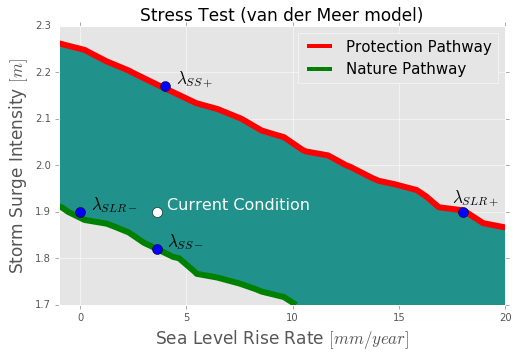

In [36]:
# plot Stress Test
fig = plt.figure(figsize=(8,5))
ax=fig.gca()
shift_text_right, shift_text_up = 0.5, 0.005

y=F.index
x=F.columns
X,Y=np.meshgrid(x,y)
F_val=F.values
p1=ax.contourf(Y,X,F_val,cmap ='viridis',levels=array([5000, 12000]))

CS2 = plt.contour(p1, levels=array([5000]),colors='r',linewidths=6,label='Path Protection')
CS3 = plt.contour(p1, levels=array([12000]),colors='g',linewidths=6,label='Path Nature')



p2=plt.plot(lambda_['CA'][0],lambda_['CA'][1],'ow',markersize=10)
p3=plt.text(lambda_['CA'][0]+shift_text_right,lambda_['CA'][1]+shift_text_up,'Current Condition',fontsize=16,color='white')


show_ATP=True

if show_ATP:
    p3=plt.plot(lambda_['SS_plus'][0],lambda_['SS_plus'][1],'ob',markersize=10)
    plt.text(lambda_['SS_plus'][0]+shift_text_right,lambda_['SS_plus'][1]+shift_text_up, '$\lambda_{SS+}$',fontsize=17)
    
    p4=plt.plot(lambda_['SLR_plus'][0],lambda_['SLR_plus'][1],'ob',markersize=10)
    plt.text(lambda_['SLR_plus'][0]-shift_text_right,lambda_['SLR_plus'][1]+4*shift_text_up, '$\lambda_{SLR+}$',fontsize=17)

    p5=plt.plot(lambda_['SLR_minus'][0],lambda_['SLR_minus'][1],'ob',markersize=10)
    plt.text(lambda_['SLR_minus'][0]+shift_text_right,lambda_['SLR_minus'][1]+shift_text_up, '$\lambda_{SLR-}$',fontsize=17)

    p6=plt.plot(lambda_['SS_minus'][0],lambda_['SS_minus'][1],'ob',markersize=10)
    plt.text(lambda_['SS_minus'][0]+shift_text_right,lambda_['SS_minus'][1]+shift_text_up, '$\lambda_{SS-}$',fontsize=17)



plt.ylim([1.7,2.4])

#ax.set( title='Stress Test')

ax.set_title('Stress Test (van der Meer model)',fontsize=17)
ax.set_ylabel('Storm Surge Intensity $[m]$', fontsize=17)
ax.set_xlabel('Sea Level Rise Rate $[mm/year]$', fontsize=17)


#plt.contourf(data_array, ,
#            ))
#plt.title("Stress test")
#cbar = plt.colorbar(p1)
#cbar.add_lines(p1)
cbar.ax.set_ylabel('Expected Frequency of Failure [year]')
# Add the contour line levels to the colorbar

# legend
blue_line = mlines.Line2D([], [], color='red',linewidth=4,
                           label='Protection Pathway')
red_line = mlines.Line2D([], [], color='green',linewidth=4,
                           label='Nature Pathway')
plt.legend(handles=[blue_line,red_line],fontsize=15)
plt.xlim([-1,20])
plt.ylim([1.7,2.3])
plt.savefig(pathfig+"StressTest2.pdf")


'../figures/Afsluitdijk/StressTest2.pdf'

In [26]:

#plt.show()

## Estimate $P(S|\lambda)$

In [27]:
class Signpost:
    def __init__(self,name,unit):
        self.name=name
        self.unit=unit
        self.statistic=[]
        self.P_S_lambda={}

### $S_{SLR}$

In [28]:
S_SLR=Signpost('$S_A$','mm/year')
S_SLR.window=10 # years

$\lambda_{CA}$, $\lambda_{1}$, $\lambda_{2}$

In [17]:
sigma_year_SL = 6 # mm / year # TODO estimate this from real data
sigma_S_SLR = sigma_year_SL / var(np.arange(S_SLR.window))

In [18]:
S_SLR.P_S_lambda['CA']=norm(loc=lambda_['CA'][0],scale=np.sqrt(sigma_S_SLR))
S_SLR.P_S_lambda['SLR_plus']=norm(loc=lambda_['SLR_plus'][0],scale=np.sqrt(sigma_S_SLR))
S_SLR.P_S_lambda['SS_plus']=norm(loc=lambda_['SS_plus'][0],scale=np.sqrt(sigma_S_SLR))

# Trigger-Power-Significance Plot

In [19]:
### $S_{SLR}$
SLR_T_PS={}

In [20]:
## $'SLR_plus'$
S_SLR_range=arange(0,27,0.5)
SLR_T_PS['SLR_plus']=T_PS(S_SLR.P_S_lambda['CA'],S_SLR.P_S_lambda['SLR_plus'],S_SLR_range)
SLR_T_PS['SS_plus']=T_PS(S_SLR.P_S_lambda['CA'],S_SLR.P_S_lambda['SS_plus'],S_SLR_range)

In [21]:
def add_legend (SLR_plus,SS_plus):
    ca = mlines.Line2D([], [], color='red',label='Significance')
    tp_1 = mlines.Line2D([], [], color='blue',label='Power, '+'SLR_plus')
    tp_2 = mlines.Line2D([], [], color='blue',linestyle='--',label='Power, '+SS_plus)
    plt.legend(handles=[ca,tp_1,tp_2])


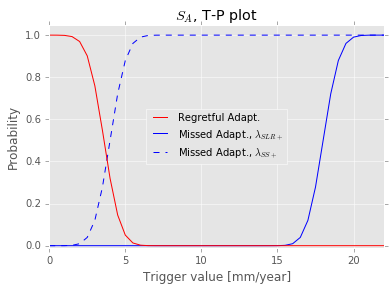

In [22]:
# plotting

a,=plt.plot(SLR_T_PS['SLR_plus']['power'],color='b',label='Missed Adapt., $\lambda_{SLR+}$')
b,=plt.plot(SLR_T_PS['SS_plus']['power'],color='b',linestyle='--',label='Missed Adapt., $\lambda_{SS+}$')
c,=plt.plot(SLR_T_PS['SLR_plus']['significance'],color='r',label='Regretful Adapt.')

T_P_specifics(S_SLR)


plt.legend(handles=[c,a,b],loc=0,fontsize=10)
plt.xlim([0,22])

plt.savefig("../Figures/S_A.pdf")

plt.show()

### $S_{SS}$

In [23]:
S_SS=Signpost(name='$S_E$',unit='m')
S_SS.window=20
S_SS.statistic=lambda yearly_max_data: pd.Series(yearly_max_data).rolling(S_SS.window).mean()

In [24]:
sigma_hist = 0.60 # TODO estimate this from data

n_years = 30 # years
conv_factor = 1000 # from mm to m

S_SS.P_S_lambda['lambda_CA'] = gumbel_r (loc = lambda_['CA'][1] + n_years / conv_factor * lambda_['CA'][0], scale = sigma_hist )
S_SS.P_S_lambda['SLR_plus'] = gumbel_r (loc = lambda_['SLR_plus'][1] + n_years / conv_factor * lambda_['SLR_plus'][0], scale = sigma_hist )
S_SS.P_S_lambda['SS_plus'] = gumbel_r (loc = lambda_['SS_plus'][1] + n_years / conv_factor * lambda_['SS_plus'][0] , scale = sigma_hist )

# tipping point 3 and 4
S_SS.P_S_lambda['SLR_minus'] = gumbel_r (loc = lambda_['SLR_minus'][1] + n_years / conv_factor * lambda_['SLR_minus'][0], scale = sigma_hist )
S_SS.P_S_lambda['SS_minus'] = gumbel_r (loc = lambda_['SS_minus'][1] + n_years / conv_factor * lambda_['SS_minus'][0] , scale = sigma_hist )


In [25]:
S_SS_est={}
for lambda_id in S_SS.P_S_lambda:    
    S_SS_est[lambda_id]=S_empirical_cdf(S_SS,lambda_id)

In [26]:
### $S_{SS}$
SS_T_PS={}

In [27]:
S_SS_range=arange(1.3,3.6,0.05)
SS_T_PS['SLR_plus']=T_PS(S_SS_est['lambda_CA'],S_SS_est['SLR_plus'],S_SS_range)
SS_T_PS['SS_plus']=T_PS(S_SS_est['lambda_CA'],S_SS_est['SS_plus'],S_SS_range)

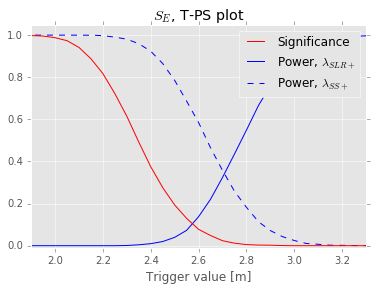

In [28]:
# plotting 
fig, ax = plt.subplots()
a,=plt.plot(SS_T_PS['SLR_plus']['power'],color='b',label='Power, $\lambda_{SLR+}$')
b,=plt.plot(1-SS_T_PS['SS_plus']['power'],color='b',linestyle='--',label='Power, $\lambda_{SS+}$')
c,=plt.plot(SS_T_PS['SLR_plus']['significance'],color='r',label='Significance')
plt.legend(handles=[c,a,b])

T_PS_specifics(S_SS)
#add_legend('$\lambda_{SLR+}$','$\lambda_{SS+}$')
plt.xlim([1.9,3.3])
#plt.savefig("../Figures/S_SS1.pdf")

plt.show()

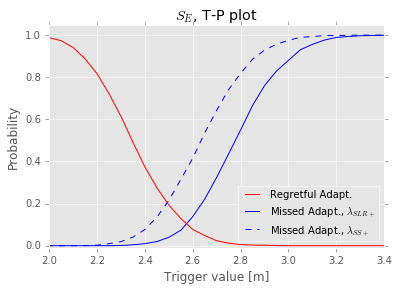

In [29]:
# plotting 
fig, ax = plt.subplots()
a,=plt.plot(SS_T_PS['SLR_plus']['power'],color='b',label='Missed Adapt., $\lambda_{SLR+}$')
b,=plt.plot(SS_T_PS['SS_plus']['power'],color='b',linestyle='--',label='Missed Adapt., $\lambda_{SS+}$')
c,=plt.plot(SS_T_PS['SLR_plus']['significance'],color='r',label='Regretful Adapt.')

band=False
if band:
    ax.fill_between(SS_T_PS['SLR_plus']['power'].index,
                SS_T_PS['SLR_plus']['power'].values.astype(np.float64),
                SS_T_PS['SS_plus']['power'].values.astype(np.float64),
                color='blue',label='Power',alpha=0.1)

plt.legend(handles=[c,a,b],bbox_to_anchor=(1, 0.3),fontsize=10)

T_P_specifics(S_SS)
#add_legend('$\lambda_{SLR+}$','$\lambda_{SS+}$')
plt.xlim([2,3.4])
plt.savefig("../Figures/S_E.pdf")
plt.ylabel('Probability')
plt.show()

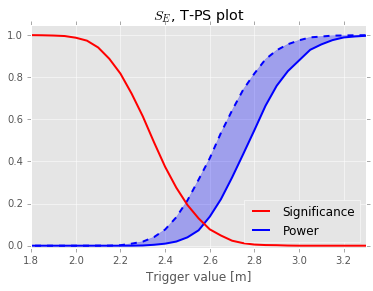

In [30]:
# plotting 


fig, ax = plt.subplots()
a,=plt.plot(SS_T_PS['SLR_plus']['power'],color='b',label='Power',linewidth=2)
b,=plt.plot(SS_T_PS['SS_plus']['power'],color='b',label='Power',linewidth=2,linestyle='--')

ax.fill_between(SS_T_PS['SLR_plus']['power'].index,
                SS_T_PS['SLR_plus']['power'].values.astype(np.float64),
                SS_T_PS['SS_plus']['power'].values.astype(np.float64),
                color='blue',label='Power',alpha=0.3)

c,=plt.plot(SS_T_PS['SLR_plus']['significance'],color='r',label='Significance',linewidth=2)
plt.legend(handles=[c,a],loc='lower right')

T_PS_specifics(S_SS)
plt.xlim([1.8,3.3])

plt.show()



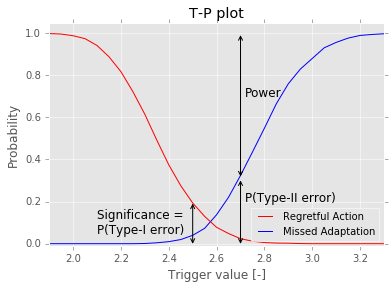

In [31]:
# Generic plot

a,=plt.plot(SS_T_PS['SLR_plus']['power'],color='b',label='Missed Adaptation')
#b,=plt.plot(1-SS_T_PS['SS_plus']['power'],color='b',label='$1-$ Power')
c,=plt.plot(SS_T_PS['SLR_plus']['significance'],color='r',label='Regretful Action')
plt.legend(handles=[c,a],loc=4,fontsize=10)

#add_legend('$\lambda_{SLR+}$','$\lambda_{SS+}$')
plt.gca().set(ylim=[-0.01,1.05],title='T-P plot',xlabel='Trigger value [-]')
plt.xlim([1.9,3.3])
plt.ylabel('Probability')

plt.text(2.1,0.05,'Significance =\nP(Type-I error)',fontsize=12)
plt.text(2.72,0.7,'Power',fontsize=12)

plt.text(2.72,0.2,'P(Type-II error)',fontsize=12)

#plt.plot([0,3],[0,0],'-k')
#plt.annotate ('dd', (2, 0), (3, 1))#, arrowprops={'arrowstyle':'<->'})

plt.annotate ('', (2.5, -0.01), (2.5, 0.2), arrowprops={'arrowstyle':'<->','color':'black','linewidth':1})
plt.annotate ('', (2.7, 0.31), (2.7, 1), arrowprops={'arrowstyle':'<->','color':'black','linewidth':1})
plt.annotate ('', (2.7, -0.01), (2.7, 0.31), arrowprops={'arrowstyle':'<->','color':'black','linewidth':1})

plt.savefig("../Figures/Generic_T_P.pdf")

plt.show()

In [32]:
plt.style.use('ggplot')

# Trigger-Consequences Plot

In [33]:
def T_C(P0,P1,S_star_range,cost_matrix):
    """"Trigger-Cost analysis
    """ 
    S_star_r=T_PS(P0,P1,S_star_range)
    S_star_costs=pd.DataFrame([],index=S_star_r.index,columns=['Missed Adaptation','Regretful Action','Total'])

    for S_star in S_star_costs.index:
        prob_matrix=matrix([[S_star_r.loc[S_star]['power'],S_star_r.loc[S_star]['significance']],
                         [S_star_r.loc[S_star]['power'],S_star_r.loc[S_star]['significance']]])
        expected_costs=multiply(cost_matrix, prob_matrix)
        S_star_costs.loc[S_star]['Missed Adaptation']=expected_costs[1,0]
        S_star_costs.loc[S_star]['Regretful Action']=expected_costs[0,1]
        S_star_costs.loc[S_star]['Total']=expected_costs[0,1]+expected_costs[1,0]
    return(S_star_costs)

T_C_specifics = lambda S:plt.gca().set(title=S.name+', T-C plot',xlabel='Trigger value ['+S.unit+']',ylabel='cost of uncertainty [M€]')

## Consequences of adaptation

In [34]:
C_a=100  #Cost of adaptation
C_cc=500 #Cost of Climate Change
cost_matrix=matrix([[0, C_a], 
                 [C_cc-C_a, 0]])

cost_matrix2=matrix([[0, 380], 
                 [320, 0]])

cost_matrix3=matrix([[1, 1], 
                 [0, 0]])

cost_matrix3=matrix([[1, 2], 
                 [100, 200]])
cost_matrix3[:,0]

matrix([[  1],
        [100]])

In [35]:
SS_T_C={}
SS_T_C['SLR_plus']=T_C(S_SS_est['lambda_CA'],S_SS_est['SLR_plus'],S_SS_range,cost_matrix2)
SS_T_C['SS_plus']=T_C(S_SS_est['lambda_CA'],S_SS_est['SS_plus'],S_SS_range,cost_matrix2)

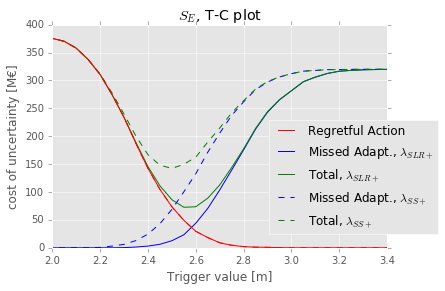

In [36]:
# plotting 
a,=plt.plot(SS_T_C['SLR_plus']['Missed Adaptation'],color='b',label='Missed Adapt., $\lambda_{SLR+}$')
c,=plt.plot(SS_T_C['SLR_plus']['Total'],color='g',label='Total, $\lambda_{SLR+}$')
d,=plt.plot(SS_T_C['SS_plus']['Missed Adaptation'],linestyle='--',color='b',label='Missed Adapt., $\lambda_{SS+}$')
e,=plt.plot(SS_T_C['SS_plus']['Regretful Action'],linestyle='--',color='r',label='Regretful Action, $\lambda_{SS+}$')
f,=plt.plot(SS_T_C['SS_plus']['Total'],linestyle='--',color='g',label='Total, $\lambda_{SS+}$')
b,=plt.plot(SS_T_C['SLR_plus']['Regretful Action'],color='r',label='Regretful Action')
            
            
#plt.plot(SS_T_C['SLR_plus'])
#plt.plot(SS_T_C['SS_plus'],linestyle='--')

T_C_specifics(S_SS)
plt.xlim([2,3.4])
plt.legend(handles=[b,a,c,d,f],loc='upper center',bbox_to_anchor=(0.90, 0.6))
#plt.savefig("../Figures/S_SS_TC1.pdf")


#plt.ylim([0,3200])

plt.show()

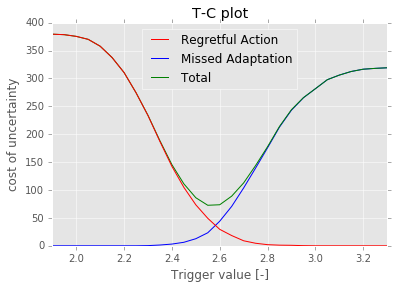

In [37]:
# plotting 
a,=plt.plot(SS_T_C['SLR_plus']['Missed Adaptation'],color='b',label='Missed Adaptation')
c,=plt.plot(SS_T_C['SLR_plus']['Total'],color='g',label='Total')
b,=plt.plot(SS_T_C['SLR_plus']['Regretful Action'],color='r',label='Regretful Action')
            
            
#plt.plot(SS_T_C['SLR_plus'])
#plt.plot(SS_T_C['SS_plus'],linestyle='--')

plt.gca().set(title='T-C plot',xlabel='Trigger value [-]',ylabel='cost of uncertainty')

plt.legend(handles=[b,a,c],loc=0)
plt.xlim([1.9,3.3])
#plt.savefig("../Figures/Generic_TC1.pdf")

plt.show()


In [38]:
SS_T_PS['SLR_minus']=T_PS(S_SS_est['lambda_CA'],S_SS_est['SLR_minus'],S_SS_range)
SS_T_PS['SS_minus']=T_PS(S_SS_est['lambda_CA'],S_SS_est['SS_minus'],S_SS_range)

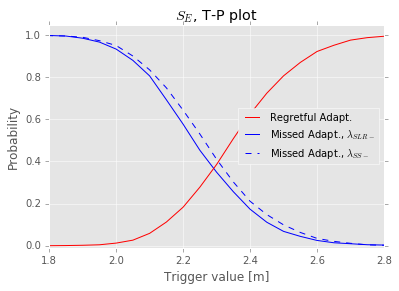

In [39]:
# plotting 
b,=plt.plot(1-SS_T_PS['SLR_minus']['power'],color='b',label='Missed Adapt., $\lambda_{SLR-}$')
c,=plt.plot(1-SS_T_PS['SS_minus']['power'],color='b',label='Missed Adapt., $\lambda_{SS-}$',linestyle='--')
a,=plt.plot(1-SS_T_PS['SLR_minus']['significance'],color='r',label='Regretful Adapt.')
plt.legend(handles=[a,b,c],loc=0,fontsize=10)

T_P_specifics(S_SS)
#add_legend('$\lambda_{SLR-}$','$\lambda_{SS-}$')
plt.xlim([1.8,2.8])
plt.savefig("../Figures/S_E_nature.pdf")

plt.show()

In [40]:
10**7/12000

833.3333333333334

Additional signpost

### $S_{RSS}$

In [41]:
n_stations=10

S_RSS=Signpost(name='$S_{RE}$',unit='$m$')
S_RSS.window=20*n_stations
S_RSS.statistic=lambda yearly_max_data: pd.Series(yearly_max_data).rolling(S_RSS.window).mean()

In [42]:
S_RSS.P_S_lambda['lambda_CA'] = S_SS.P_S_lambda['lambda_CA']
S_RSS.P_S_lambda['SLR_minus'] = S_SS.P_S_lambda['SLR_minus']
S_RSS.P_S_lambda['SS_minus'] = S_SS.P_S_lambda['SS_minus']

In [43]:
S_RSS_est={}
for lambda_id in S_RSS.P_S_lambda:    
    S_RSS_est[lambda_id]=S_empirical_cdf(S_RSS,lambda_id)

In [44]:
RSS_T_PS={}
S_RSS_range=arange(1.5,3,0.01)
RSS_T_PS['SLR_minus']=T_PS(S_RSS_est['lambda_CA'],S_RSS_est['SLR_minus'],S_RSS_range)
RSS_T_PS['SS_minus']=T_PS(S_RSS_est['SLR_minus'],S_RSS_est['SS_minus'],S_RSS_range)

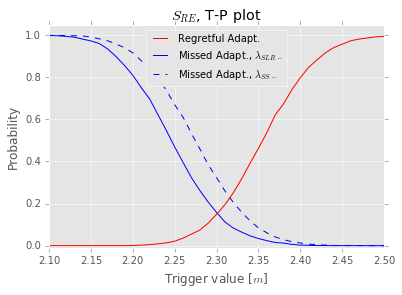

In [45]:
# plotting 
b,=plt.plot(1-RSS_T_PS['SLR_minus']['power'],color='b',label='Missed Adapt., $\lambda_{SLR-}$')
c,=plt.plot(1-RSS_T_PS['SS_minus']['power'],color='b',label='Missed Adapt., $\lambda_{SS-}$',linestyle='--')
a,=plt.plot(1-RSS_T_PS['SLR_minus']['significance'],color='r',label='Regretful Adapt.')
plt.legend(handles=[a,b,c],loc=0,fontsize=10)

T_P_specifics(S_RSS)
#add_legend('$\lambda_{SLR-}$','$\lambda_{SS-}$')
plt.xlim([2.1,2.5])
#plt.savefig("../Figures/S_RSS1.pdf")
plt.savefig("../Figures/S_RE_nature.pdf")

plt.show()

In [46]:
B_path_nature=100  #Cost of adaptation
C_path_nature=350 #Cost of Climate Change
cost_matrix_nature=matrix([[B_path_nature, 0], 
                 [0, C_path_nature]])

cost_matrix_nature2=matrix([[0, 200], 
                 [1, 0]])

In [47]:
RSS_T_C={}
RSS_T_C['lambda_['SLR_minus']']=T_C(S_RSS_est['lambda_['CA']'],S_RSS_est['lambda_['SLR_minus']'],S_RSS_range,cost_matrix_nature2)
RSS_T_C['lambda_['SS_minus']']=T_C(S_RSS_est['lambda_['CA']'],S_RSS_est['lambda_['SS_minus']'],S_RSS_range,cost_matrix_nature2)

SyntaxError: invalid syntax (<ipython-input-47-c238afb8eaa3>, line 2)

In [ ]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.set_xlabel('Trigger value [m]')
ax1.set_ylabel('Benefit Path Nature [happy]', color='r')
ax2.set_ylabel('Cost Path Nature [$]', color='b')

a,=ax1.plot(RSS_T_C['lambda_['SLR_minus']']['Missed Adaptation'],color='b',label='Missed Adapt., $\lambda_{SLR+}$')
d,=ax1.plot(RSS_T_C['lambda_['SS_minus']']['Missed Adaptation'],linestyle='--',color='b',label='Missed Adapt., $\lambda_{SS+}$')
b,=ax2.plot(RSS_T_C['lambda_['SLR_minus']']['Regretful Action'],color='r',label='Regretful Action')
            
            
#plt.plot(SS_T_C['SLR_plus'])
#plt.plot(SS_T_C['SS_plus'],linestyle='--')


#ax1.set_ylim([0,300])
#ax2.set_ylim([0,1.5])


plt.legend(handles=[b,a,d],loc=0)
plt.xlim([2,2.7])

#plt.savefig("../Figures/S_RSS_TC1.pdf")

plt.show()



In [ ]:

x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()